# Breast Cancer Classification Using SVC and Logistic Regression

I will be using the [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) dataset to do breast cancer classification that can help diagnose patients. This data set provides a good foundation for a classification problem and can be used for similar classification problems. Here, i will use both SVC and Logistic Regression as the classifiers and to see which one has a better performance.

- Data set: [Breast Cancer Wisconsin (Diagnostic)](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic))
- Classifier: SVC, Logistic Regression

## 0. Import useful libraries

In [1]:
# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

# Import some necessary libararies 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
RANDOM_STATE = 42

## 1.Data preparation

### 1.1 Load the data
- Load breast cancer data from scikit-learn
- Transform the raw data  (Bunch object) to a dataframe.

In [3]:
from sklearn.datasets import load_breast_cancer

# Load the dataset from scikit-learn.
cancer = load_breast_cancer()
# cancer.keys() 

In [4]:
cancer_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
cancer_df['target'] = cancer.target
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### 1.2 Clean the data
- Cancer dataframe is clean. No missing values, wrong data types.

In [5]:
print(cancer_df.shape)

(569, 31)


In [6]:
cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

### 1.3 Explore class distribution
- Check if the class is imbalance.
- The data of class 1 (having breast cancer) is a bit more than the data of class 0 (without breast cancer), but in reality it is not considered heavily imbalance and can be used for analysis.

In [7]:
cancer_df.target.value_counts()

1    357
0    212
Name: target, dtype: int64

## 2. Split data

### 2.1 Train-test split 
- Since data is not large here, i only split the data into trainning and test data, no validation data.
- Data can be further split into train, dev, test if you have larger data set.

In [8]:
from sklearn.model_selection import train_test_split

X = cancer_df.drop('target', axis=1)
y = cancer_df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = RANDOM_STATE)

## 3 Create dummy classifiers 

### 3.1 Create two dummy classifiers as baseline
- use dummy classifier as a simple sanity-check to compare real classifier performance
- stratified dummy classifier represents the label distribution of the training data set
- most frequent dummy classifier represents the majority class of the training data set


In [9]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def make_dummy_classidiers(X_train, y_train, X_test, y_test):
    # make two dummy classifiers and fit the training data
    dummy_A = DummyClassifier(strategy = 'stratified', random_state = RANDOM_STATE)
    dummy_A.fit(X_train, y_train)
    dummy_B = DummyClassifier(strategy = 'most_frequent', random_state = RANDOM_STATE)
    dummy_B.fit(X_train, y_train)

    # get the predicted classes
    dummy_A_pred = dummy_A.predict(X_test)
    dummy_B_pred = dummy_B.predict(X_test)

    # get precision, recall, and accuracy scores for each dummy classifier
    preA, recA, accA = precision_score(y_test, dummy_A_pred), recall_score(y_test, dummy_A_pred),dummy_A.score(X_test, y_test)
    preB, recB, accB = precision_score(y_test, dummy_B_pred), recall_score(y_test, dummy_B_pred),dummy_B.score(X_test, y_test)
    
    return (preA, recA, accA),( preB, recB, accB)

### 3.2 Evaluate dummy classidiers
- get the precision, recall, and accuracy scores of the dummy classifiers

In [10]:
dummy_A_scores, dummy_B_scores = make_dummy_classidiers(X_train, y_train, X_test, y_test)

In [11]:
print('Dummy classifier A (Stratified) scores:')
print('Precision: {}, Recall: {}, Accuracy: {}'.format(dummy_A_scores[0],dummy_A_scores[1],dummy_A_scores[2]))
print('-----------------------')
print('Dummy classifier B (Most frequent) scores:')
print('Precision: {}, Recall: {}, Accuracy: {}'.format(dummy_B_scores[0],dummy_B_scores[1],dummy_B_scores[2]))

Dummy classifier A (Stratified) scores:
Precision: 0.6236559139784946, Recall: 0.651685393258427, Accuracy: 0.5384615384615384
-----------------------
Dummy classifier B (Most frequent) scores:
Precision: 0.6223776223776224, Recall: 1.0, Accuracy: 0.6223776223776224


## 4. Apply SVC classifier

### 4.1 Training model 

In [12]:
from sklearn.svm import SVC

def make_SVC_classifier(X_train, X_test, y_train, y_test, 
                        kernel = 'rbf', C=1, gamma = 'scale', # defult para values
                        random_state = RANDOM_STATE):
    svc = SVC(kernel= kernel, C =C, random_state = random_state) 
    svc.fit(X_train, y_train)

    svc_preds = svc.predict(X_test)
    preSVC, recCSV, accCSV = precision_score(y_test, svc_preds), recall_score(y_test, svc_preds), svc.score(X_test, y_test)
    
    return (preSVC, recCSV, accCSV), svc, svc_preds

### 4.2 Evaluating  model
- get the precision, recall, and accuracy scores of the dummy classifiers
- using precision_recall_curve

#### Evaluation using precision, recall, and accuracy scores


In [13]:
svc_scores, svc, svc_preds = make_SVC_classifier(X_train, X_test, y_train, y_test)

print('SVC classifier scores:')
print('Precision: {}, Recall: {}, Accuracy: {}'.format(svc_scores[0],svc_scores[1],svc_scores[2]))

SVC classifier scores:
Precision: 0.9361702127659575, Recall: 0.9887640449438202, Accuracy: 0.951048951048951


#### Evaluation using precision_recall_curve

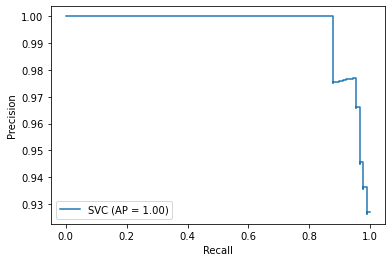

In [14]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve
# probas_pred is the target scores, 
# can either be probability estimates of the positive class, lr.predict_proba(X_test)[:,1]
# or non-thresholded meature of decisions, decision_function
# probas_pred = svc.decision_function(X_test)
# precision, recall, thresholds = precision_recall_curve(y_test, probas_pred)

plot_precision_recall_curve(svc, X_test, y_test);

## 5. Apply Logistic Regression classifier

### 5.1 Training model


In [15]:
from sklearn.linear_model import LogisticRegression

def make_logreg_classifier(X_train, X_test, y_train, y_test, 
                        penalty = 'l2', C=1,  # defult para values
                        random_state = RANDOM_STATE):
    lr = LogisticRegression(random_state = random_state)
    lr.fit(X_train, y_train)

    lr_preds = lr.predict(X_test)
    prelr, reclr, acclr = precision_score(y_test, lr_preds), recall_score(y_test, lr_preds), lr.score(X_test, y_test)
    
    return (prelr, reclr, acclr), lr, lr_preds

### 5.2 Evaluating  model
- get the precision, recall, and accuracy scores of the dummy classifiers
- using precision_recall_curve

#### Evaluation using precision, recall, and accuracy scores

In [16]:
lr_scores, lr, lr_preds = make_logreg_classifier(X_train, X_test, y_train, y_test)
print('Logistic Regression classifier scores:')
print('Precision: {}, Recall: {}, Accuracy: {}'.format(lr_scores[0],lr_scores[1],lr_scores[2]))

Logistic Regression classifier scores:
Precision: 0.9666666666666667, Recall: 0.9775280898876404, Accuracy: 0.965034965034965


#### Evaluation using precision_recall_curve

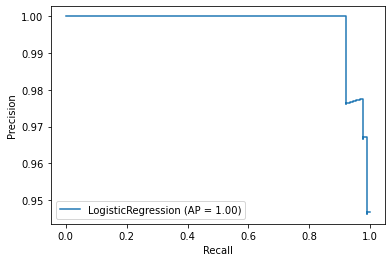

In [17]:
plot_precision_recall_curve(lr, X_test, y_test);

### Findings:
1. Overall, both the SVC and Logistic regression classifiers perform great on the Winsconsin dataset. 
    - The SVC classifier has a little bit higher recall rate than the logistic regression (recall: 0.99 vs 0.98), 
    - and a bit lower precision and accuracy rate than the logistic regression classifier (precison: 0.94 vs 0.97, accuracy: 0.95 vs 0.97).
2. Personally, i preper using Logistic regression as the final best model since it has 2 over 3 higher scores than the SVC model.

### 5.3  Model optimization
False negatives will mark malignant(1) cells as Benign(0) cells. In the cancer detection scenario, false negatives are obviously very undesirable, because it would cause patients who do have malignant cells to be falsely detected as not, which may result in them not being treated later. Therefore, with the recall and precison trade-off, we would prefer a model with higher recall socre, and tolerate lower precison score. This is the classic precision-recall tradeoff. In this case, we prefer model with higher recall score, reducing the false negatives and allow more false positives passing through the classifier. 

- Tunning parameters using GridSearchCV to optimize model recall score

In [18]:
from sklearn.model_selection import GridSearchCV

def GridSearch_lr_best_params(solver, scoring, cv, grid_values, random_state = RANDOM_STATE):
    # tunning params
    logre = LogisticRegression(solver = solver, random_state = random_state)
    grid_clf = GridSearchCV(logre, param_grid = grid_values, scoring = scoring, cv = cv)
    grid_clf.fit(X_train, y_train)
    return grid_clf 

In [19]:
# define params
solver = 'liblinear'
scoring = 'recall'
cv = 5
grid_values = {'penalty': ['l1', 'l2'], 'C':[0.05, 0.1, 1, 10, 100]}

In [20]:
grid_clf = GridSearch_lr_best_params(solver, scoring, cv, grid_values, 
                                     random_state = RANDOM_STATE)

In [21]:
# get the mean test score from the cv_results_ 
mean_test_score = grid_clf.cv_results_['mean_test_score'].reshape(5,2)

# the best params result
print('Best parameters: ')
print(grid_clf.best_params_)
print('--------------')
print('Best score:')
print(grid_clf.best_score_)

Best parameters: 
{'C': 10, 'penalty': 'l1'}
--------------
Best score:
0.9775681341719078


### Visualize the result from GridSearchCV

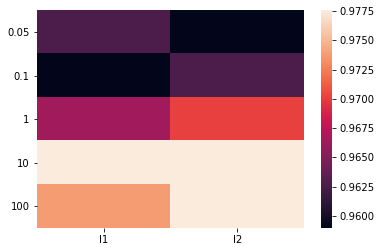

In [22]:
def GridSearch_Heatmap(scores, grid_values):
    plt.figure()
    sns.heatmap(scores,
                xticklabels = grid_values['penalty'],
                yticklabels = grid_values['C'])
    plt.yticks(rotation=0);

# Remember to comment it out before submitting the notebook
GridSearch_Heatmap(mean_test_score, grid_values)

### Findings:

1. With L1 panalty and C = 10, the optimized logistic regression classifier did increase the model recall rate (from 0.977528 to 0.977568). 
2. Only slightly increased the recall rate, may be the data set is not large enough or the default classifier is good enough for this case. 

## Test model with new data
- Predict result by giving a series of new breast cells data

In [31]:
# you can change the data below and give a try
new_data = np.array([2.799e+03, 1.038e+01, 1.228e+02, 1.701e+04, 1.184e-01, 
                     2.776e-01, 3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 
                     1.095e+00, 9.053e+01, 4.589e+03, 1.534e-02, 6.399e-03, 
                     4.904e-02, 5.373e+02, 1.587e-02, 3.003e-02, 7.193e-03, 
                     2.558e+03, 1.733e+01, 1.856e+02, 2.019e+01,1.623e-01, 
                     3.656e-01, 2.119e+01, 2.654e-01, 6.601e-01, 1.139e-01,]).reshape(1,-1)

In [32]:
# prediction using optimized logristic regression
result = grid_clf.predict(new_data)
if result == 0:
    print('Benign')
else:
    print('Malignant')


Malignant


In [33]:
grid_clf.predict_proba(new_data)

array([[0., 1.]])

In [34]:
grid_clf.predict(new_data)

array([1])